In [1]:
from dereverberator_gan import Generator, Discriminator, train_gan
import helper_funcs as hf
import torch

clean_speech_paths = hf.listfiles("LibriSpeech\\dev-clean")
rir_paths = hf.listfiles("rirs_noises\\simulated_rirs")

print("Total clean speech samples:", len(clean_speech_paths))
print("Total rirs:", len(rir_paths))

Total clean speech samples: 2703
Total rirs: 60000


In [2]:
NFFT=512
sr = 16000
win_len = int(0.032 * sr)
hop_len = int(0.016 * sr)

In [3]:
generator = Generator()

generator.load_state_dict(torch.load("generator_25k.pt"))

<All keys matched successfully>

In [16]:
rir_paths[5400]

'rirs_noises\\simulated_rirs\\largeroom\\Room055\\Room055-00001.wav'

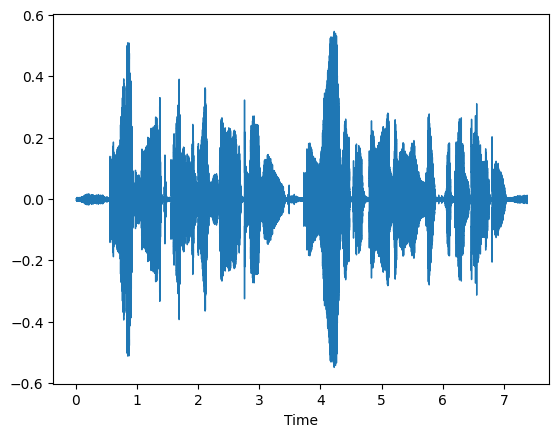

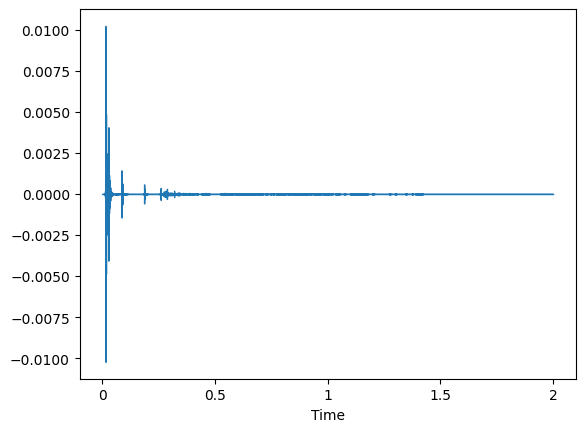

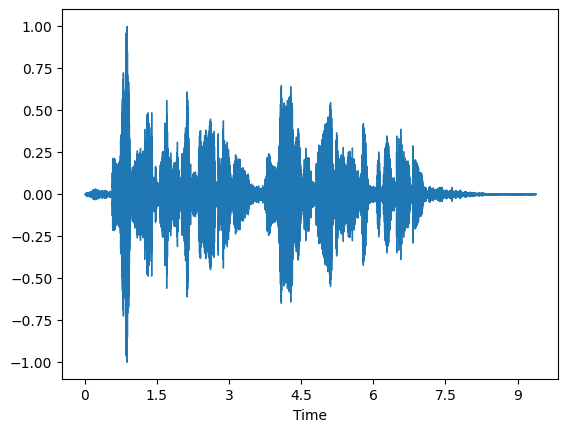

In [4]:
import soundfile as sf
import random
import librosa 
from librosa.display import waveshow, specshow
import matplotlib.pyplot as plt


clean_speech, sr = sf.read(clean_speech_paths[30])
rir, sr = sf.read(rir_paths[0])
rev_speech = hf.convolve_ir(clean_speech, rir_paths[0])

sf.write("with_reverb.wav", rev_speech, sr)
sf.write("clean_speech.wav", clean_speech, sr)

waveshow(clean_speech, sr=sr, x_axis='time')
plt.figure()
waveshow(rir, sr=sr, x_axis='time')
plt.figure()
waveshow(rev_speech, sr=sr, x_axis='time')
plt.show()

z:\dev\languages\python10\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


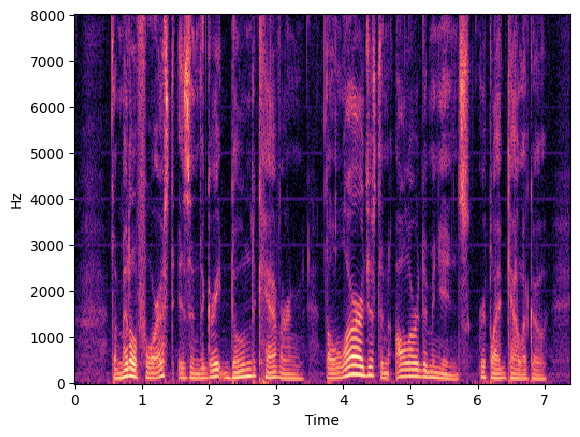

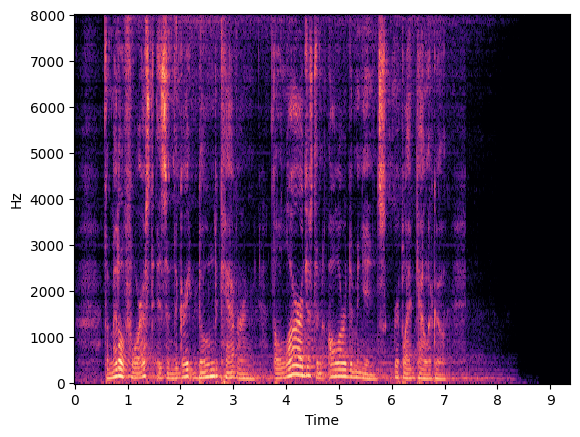

In [5]:
import numpy as np
win_len = int(0.032 * sr)
hop_len = int(0.016 * sr)

clean_speech_stft = hf.wave_to_stft(clean_speech, sr, win_len, hop_len)
rev_speech_stft = hf.wave_to_stft(rev_speech, sr, win_len, hop_len)

specshow(librosa.amplitude_to_db(clean_speech_stft, ref=np.max), sr=sr, hop_length=hop_len, n_fft=512, win_length=win_len, x_axis='time', y_axis='fft')
plt.figure()
specshow(librosa.amplitude_to_db(rev_speech_stft, ref=np.max), sr=sr, hop_length=hop_len, win_length=win_len, n_fft=512, x_axis='time', y_axis='fft')
plt.show()

In [11]:
with torch.no_grad():
    rev_speech_t = torch.Tensor(rev_speech_stft)
    inv_ir = generator(rev_speech_t)
    filtered_speech = rev_speech_t.T * inv_ir
    filtered_speech = filtered_speech.numpy().T

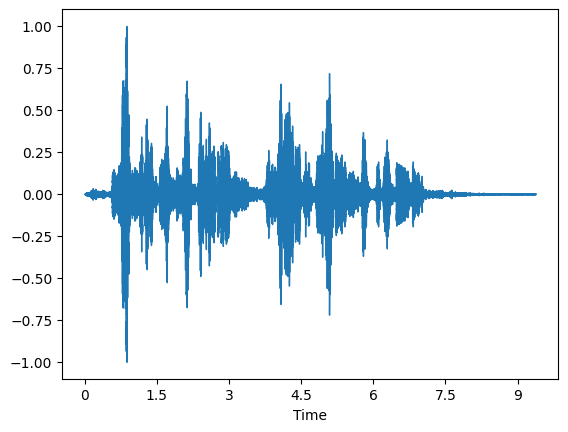

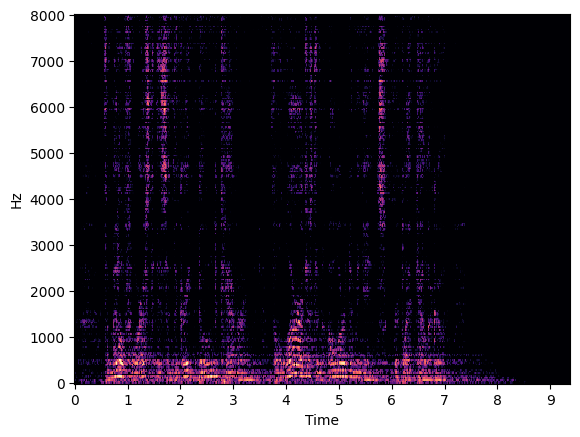

In [12]:
filtered_wave = librosa.util.normalize(hf.stft_to_wave(filtered_speech, sr=sr, win_len=win_len, hop_len=hop_len))
waveshow(filtered_wave, sr=sr, x_axis='time')
plt.figure()
specshow(librosa.amplitude_to_db(filtered_speech, ref=np.max), sr=sr, hop_length=hop_len, win_length=win_len, n_fft=512, x_axis='time', y_axis='fft')
plt.show()
sf.write("filtered_speech.wav", filtered_wave, sr)